# Graph showing mean, min and max age of MPs for each office

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Import 'combined_parliaments_new.csv' file from local directory

In [39]:
import os
os.chdir('C:/Users/Kuma/Documents/Python Scripts/FML')
cp_raw=pd.read_csv('combined_parliaments_new.csv')

Subset parliament office number and corresponding year

In [40]:
year_raw=cp_raw[['Year', 'Number']]
year_raw['Number'].astype(str)
year_raw['Number']=year_raw['Number'].str.extract('(\d+)')#delete "th" and "st" from Number column
year=year_raw.dropna()#delete nas
year.columns=['year', 'office']#rename columns
year=year.astype(int)#change to int
year

,year,office
0,1968,28
1,1972,29
2,1974,30
3,1979,31
4,1980,32
5,1984,33
6,1988,34
7,1993,35
8,1997,36
9,2000,37


Subset office and age columns

In [46]:
cp=cp_raw[['Office', 'Age']]
cp

,Office,Age
0,43,NaN
1,43,NaN
2,43,NaN
3,42,NaN
4,42,NaN
...,...,...
4680,41,21.0
4681,43,21.0
4682,35,20.0
4683,41,20.0


In [41]:
#count the number of NAs in each office
nas=cp.Age.isnull().groupby(cp['Office']).sum().astype(int).reset_index(name='age.is.na')
nas

,Office,age.is.na
0,28,0
1,29,0
2,30,0
3,31,0
4,32,0
5,33,0
6,34,0
7,35,0
8,36,0
9,37,0


Calculate the mean, min, max age and count for each office

In [47]:
calc=cp.groupby('Office').agg({'Age':['count','mean', 'min','max']}).astype(int)

Age             
       count mean min max
Office                   
28       251   46  21  73
29       241   46  20  77
30       241   48  22  79
31       241   53  27  84
32       273   46  24  76
33       274   47  24  80
34       288   48  28  77
35       296   47  20  69
36       307   49  24  73
37       310   51  24  73
38       310   51  25  74
39       315   51  27  76
40       315   51  21  78
41       321   50  20  74
42       336   50  24  79
43       314   52  21  79

## Summary of MP age data by office/year

In [48]:
#merge the tables
result_raw=pd.merge(calc, nas, on='Office', how='left')
result_raw=result_raw.rename(columns={'Office':'office'})#rename column Office to office
#rename columns
result_raw.columns=['office', 'count', 'mean', 'min', 'max', 'age.is.na']
result=pd.merge(result_raw, year, on='office', how='left')

#calculate percentage of unknown age per office
result['percent.na']=result['age.is.na'] / result['count'] *100
result=result.round(1)#set decimal place to 1
result

,office,count,mean,min,max,age.is.na,year,percent.na
0,28,251,46,21,73,0,1968,0.0
1,29,241,46,20,77,0,1972,0.0
2,30,241,48,22,79,0,1974,0.0
3,31,241,53,27,84,0,1979,0.0
4,32,273,46,24,76,0,1980,0.0
5,33,274,47,24,80,0,1984,0.0
6,34,288,48,28,77,0,1988,0.0
7,35,296,47,20,69,0,1993,0.0
8,36,307,49,24,73,0,1997,0.0
9,37,310,51,24,73,0,2000,0.0


## Create a lineplot showing the mean, min, max age by year

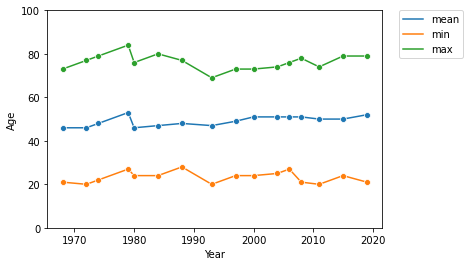

In [49]:
#put mean, min, max into long form
result_long=pd.melt(result, id_vars=['office','count','age.is.na','year','percent.na'], value_vars=['mean','min', 'max'])
result_long

#plot a lineplot showing the mean,min,max age for each office year
sns.lineplot(data=result_long, x="year", y="value",hue="variable", marker="o")
plt.ylim(0,100)
plt.xlabel("Year")
plt.ylabel("Age")
plt.legend(bbox_to_anchor=(1.05,1), borderaxespad=0.)


## Same plot as above but showing by office instead of year

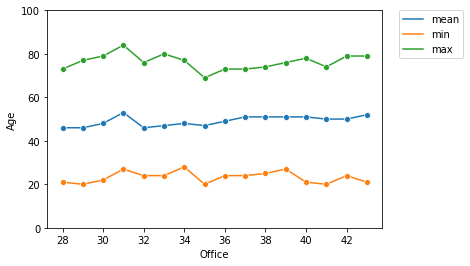

In [50]:
#plot a lineplot showing the mean,min,max age for each office year
sns.lineplot(data=result_long, x="office", y="value",hue="variable", marker="o")
plt.ylim(0,100)
plt.xlabel("Office")
plt.ylabel("Age")
plt.legend(bbox_to_anchor=(1.05,1), borderaxespad=0.)
